# 제목

2024.01.28

---

## 1. 프로젝트 개요

### 1-1. 프로젝트 요약
- 제목: 제목
- 설명: 설명
- 사용한 데이터셋
    - [제목](링크): 설명
- 진행 절차 및 내용
    - 내용1
    - 내용2
- 사용한 스킬셋
    - pandas
    - matplotlib, seaborn
    - ...

### 1-2. 프로젝트 진행 배경

내용

---

## 2. 데이터 로딩 및 EDA

### 2-1. 데이터 불러오기

In [71]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import koreanize_matplotlib
import seaborn as sns
import pickle
import json
from datetime import datetime

In [2]:
offering_df = pd.read_csv('offerings.csv')
offering_df

,hotel_class,region_id,url,phone,details,address,type,id,name
0,4.0,60763,http://www.tripadvisor.com/Hotel_Review-g60763...,NaN,NaN,"{'region': 'NY', 'street-address': '147 West 4...",hotel,113317,Casablanca Hotel Times Square
1,5.0,32655,http://www.tripadvisor.com/Hotel_Review-g32655...,NaN,NaN,"{'region': 'CA', 'street-address': '300 S Dohe...",hotel,76049,Four Seasons Hotel Los Angeles at Beverly Hills
2,3.5,60763,http://www.tripadvisor.com/Hotel_Review-g60763...,NaN,NaN,"{'region': 'NY', 'street-address': '790 Eighth...",hotel,99352,Hilton Garden Inn Times Square
3,4.0,60763,http://www.tripadvisor.com/Hotel_Review-g60763...,NaN,NaN,"{'region': 'NY', 'street-address': '152 West 5...",hotel,93589,The Michelangelo Hotel
4,4.0,60763,http://www.tripadvisor.com/Hotel_Review-g60763...,NaN,NaN,"{'region': 'NY', 'street-address': '130 West 4...",hotel,217616,The Muse Hotel New York
...,...,...,...,...,...,...,...,...,...
4328,5.0,28970,http://www.tripadvisor.com/Hotel_Review-g28970...,NaN,NaN,"{'region': 'DC', 'street-address': '1201 24th ...",hotel,84090,Park Hyatt Washington
4329,5.0,28970,http://www.tripadvisor.com/Hotel_Review-g28970...,NaN,NaN,"{'region': 'DC', 'street-address': '2800 Penns...",hotel,84065,Four Seasons Washington D.C.
4330,4.0,28970,http://www.tripadvisor.com/Hotel_Review-g28970...,NaN,NaN,"{'region': 'DC', 'street-address': '2121 P Str...",hotel,84093,"Palomar Washington DC, a Kimpton Hotel"
4331,4.5,28970,http://www.tripadvisor.com/Hotel_Review-g28970...,NaN,NaN,"{'region': 'DC', 'street-address': '806 15th S...",hotel,235513,Sofitel Washington DC


In [3]:
offering_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4333 entries, 0 to 4332
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   hotel_class  3141 non-null   float64
 1   region_id    4333 non-null   int64  
 2   url          4333 non-null   object 
 3   phone        0 non-null      float64
 4   details      0 non-null      float64
 5   address      4333 non-null   object 
 6   type         4333 non-null   object 
 7   id           4333 non-null   int64  
 8   name         4333 non-null   object 
dtypes: float64(3), int64(2), object(4)
memory usage: 304.8+ KB


In [4]:
offering_df.isna().sum()

hotel_class    1192
region_id         0
url               0
phone          4333
details        4333
address           0
type              0
id                0
name              0
dtype: int64

In [5]:
offering_df = offering_df.drop(['phone', 'details'], axis=1)
offering_df.isna().sum()

hotel_class    1192
region_id         0
url               0
address           0
type              0
id                0
name              0
dtype: int64

In [26]:
review_df = pd.read_csv('reviews.csv')
review_df

,ratings,title,text,author,date_stayed,offering_id,num_helpful_votes,date,id,via_mobile
0,"{'service': 5.0, 'cleanliness': 5.0, 'overall'...","“Truly is ""Jewel of the Upper Wets Side""”",Stayed in a king suite for 11 nights and yes i...,"{'username': 'Papa_Panda', 'num_cities': 22, '...",December 2012,93338,0,2012-12-17,147643103,False
1,"{'service': 5.0, 'cleanliness': 5.0, 'overall'...",“My home away from home!”,"On every visit to NYC, the Hotel Beacon is the...","{'username': 'Maureen V', 'num_reviews': 2, 'n...",December 2012,93338,0,2012-12-17,147639004,False
2,"{'service': 4.0, 'cleanliness': 5.0, 'overall'...",“Great Stay”,This is a great property in Midtown. We two di...,"{'username': 'vuguru', 'num_cities': 12, 'num_...",December 2012,1762573,0,2012-12-18,147697954,False
3,"{'service': 5.0, 'cleanliness': 5.0, 'overall'...",“Modern Convenience”,The Andaz is a nice hotel in a central locatio...,"{'username': 'Hotel-Designer', 'num_cities': 5...",August 2012,1762573,0,2012-12-17,147625723,False
4,"{'service': 4.0, 'cleanliness': 5.0, 'overall'...",“Its the best of the Andaz Brand in the US....”,I have stayed at each of the US Andaz properti...,"{'username': 'JamesE339', 'num_cities': 34, 'n...",December 2012,1762573,0,2012-12-17,147612823,False
...,...,...,...,...,...,...,...,...,...,...
878556,{'overall': 4.0},“vil komme igen”,"Pænt hotel i et livligt miljø. Store værelser,...","{'username': '', 'id': '', 'location': ''}",NaN,84093,0,2008-08-31,51441576,False
878557,"{'service': 4.0, 'cleanliness': 5.0, 'overall'...",“excellent”,"un excellent hotel 4 *, pour un prix raisonnab...","{'username': 'dan016', 'num_reviews': 2, 'num_...",July 2008,84093,0,2008-07-18,18003332,False
878558,"{'cleanliness': 5.0, 'overall': 5.0, 'rooms': ...",“Un hotel eccezionale”,"L'hotel, situato in una zona tranquilla e a du...","{'username': '', 'id': '', 'location': ''}",July 2008,84093,0,2008-04-18,15564515,False
878559,"{'cleanliness': 5.0, 'overall': 5.0, 'rooms': ...",“Gerne wieder”,Sehr schön ausgestattetes Hotel in bester Lage...,"{'username': '', 'id': '', 'location': ''}",July 2008,84093,0,2008-04-01,15564508,False


In [7]:
review_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 878561 entries, 0 to 878560
Data columns (total 10 columns):
 #   Column             Non-Null Count   Dtype 
---  ------             --------------   ----- 
 0   ratings            878561 non-null  object
 1   title              878561 non-null  object
 2   text               878561 non-null  object
 3   author             878561 non-null  object
 4   date_stayed        810967 non-null  object
 5   offering_id        878561 non-null  int64 
 6   num_helpful_votes  878561 non-null  int64 
 7   date               878561 non-null  object
 8   id                 878561 non-null  int64 
 9   via_mobile         878561 non-null  bool  
dtypes: bool(1), int64(3), object(6)
memory usage: 61.2+ MB


In [27]:
isna_df = review_df.isna().sum().to_frame().rename(columns={0: 'NaN'})
isna_df['Count'] = review_df.shape[0]
isna_df['NaN Ratio'] = isna_df['NaN'] / isna_df['Count']
isna_df[isna_df['NaN Ratio'] > 0]

,NaN,Count,NaN Ratio
date_stayed,67594,878561,0.076937


대략 8.3% 정도의 결측치가 있다. 숙박을 하지 않은 상태에서 리뷰를 달 수가 있는 모양이다.

### 2-2. 데이터 분포 확인 및 전처리 (reviews.csv)

#### 2-2-1. 컬럼별 EDA (ratings)

In [29]:
review_df['ratings'][0]

"{'service': 5.0, 'cleanliness': 5.0, 'overall': 5.0, 'value': 5.0, 'location': 5.0, 'sleep_quality': 5.0, 'rooms': 5.0}"

json으로 들어가 있는데 또 결측치가 있는 케이스가 있어서... 꽤나 골치아프다.

In [28]:
def extract_ratings_overall(txt):
    try:
        return json.loads(txt.replace("'", '"'))['overall']
    except (json.JSONDecodeError, KeyError):
        return None
    
def extract_ratings_service(txt):
    try:
        return json.loads(txt.replace("'", '"'))['service']
    except (json.JSONDecodeError, KeyError):
        return None
    
def extract_ratings_cleanliness(txt):
    try:
        return json.loads(txt.replace("'", '"'))['cleanliness']
    except (json.JSONDecodeError, KeyError):
        return None
    
def extract_ratings_value(txt):
    try:
        return json.loads(txt.replace("'", '"'))['value']
    except (json.JSONDecodeError, KeyError):
        return None
    
def extract_ratings_location(txt):
    try:
        return json.loads(txt.replace("'", '"'))['location']
    except (json.JSONDecodeError, KeyError):
        return None

def extract_ratings_sleep_quality(txt):
    try:
        return json.loads(txt.replace("'", '"'))['sleep_quality']
    except (json.JSONDecodeError, KeyError):
        return None

def extract_ratings_rooms(txt):
    try:
        return json.loads(txt.replace("'", '"'))['rooms']
    except (json.JSONDecodeError, KeyError):
        return None
    
review_df['ratings_overall'] = review_df['ratings'].apply(extract_ratings_overall)
review_df['ratings_service'] = review_df['ratings'].apply(extract_ratings_service)
review_df['ratings_cleanliness'] = review_df['ratings'].apply(extract_ratings_cleanliness)
review_df['ratings_value'] = review_df['ratings'].apply(extract_ratings_value)
review_df['ratings_location'] = review_df['ratings'].apply(extract_ratings_location)
review_df['ratings_sleep_quality'] = review_df['ratings'].apply(extract_ratings_sleep_quality)
review_df['ratings_rooms'] = review_df['ratings'].apply(extract_ratings_rooms)

review_df[[
    'ratings_overall', 'ratings_service', 'ratings_cleanliness', 'ratings_value',
    'ratings_location', 'ratings_sleep_quality', 'ratings_rooms'
]]

,ratings_overall,ratings_service,ratings_cleanliness,ratings_value,ratings_location,ratings_sleep_quality,ratings_rooms
0,5.0,5.0,5.0,5.0,5.0,5.0,5.0
1,5.0,5.0,5.0,5.0,5.0,5.0,5.0
2,4.0,4.0,5.0,4.0,5.0,4.0,4.0
3,4.0,5.0,5.0,5.0,5.0,5.0,5.0
4,4.0,4.0,5.0,3.0,5.0,5.0,5.0
...,...,...,...,...,...,...,...
878556,4.0,NaN,NaN,NaN,NaN,NaN,NaN
878557,4.0,4.0,5.0,4.0,4.0,NaN,5.0
878558,5.0,5.0,5.0,NaN,NaN,NaN,5.0
878559,5.0,5.0,5.0,NaN,NaN,NaN,5.0


In [32]:
rating_columns = [
    'ratings_overall', 'ratings_service', 'ratings_cleanliness', 'ratings_value',
    'ratings_location', 'ratings_sleep_quality', 'ratings_rooms'
]

In [33]:
review_df[rating_columns].isna().sum()

ratings_overall               0
ratings_service          117643
ratings_cleanliness      118726
ratings_value            124866
ratings_location         213657
ratings_sleep_quality    377658
ratings_rooms            173157
dtype: int64

In [34]:
isna_df = review_df[rating_columns].isna().sum().to_frame().rename(columns={0: 'NaN'})
isna_df['Count'] = review_df.shape[0]
isna_df['NaN Ratio'] = isna_df['NaN'] / isna_df['Count']
isna_df[isna_df['NaN Ratio'] > 0]

,NaN,Count,NaN Ratio
ratings_service,117643,878561,0.133904
ratings_cleanliness,118726,878561,0.135137
ratings_value,124866,878561,0.142126
ratings_location,213657,878561,0.243190
ratings_sleep_quality,377658,878561,0.429860
ratings_rooms,173157,878561,0.197092


```ratings_overall```를 제외한 모든 컬럼에 결측치가 있다.

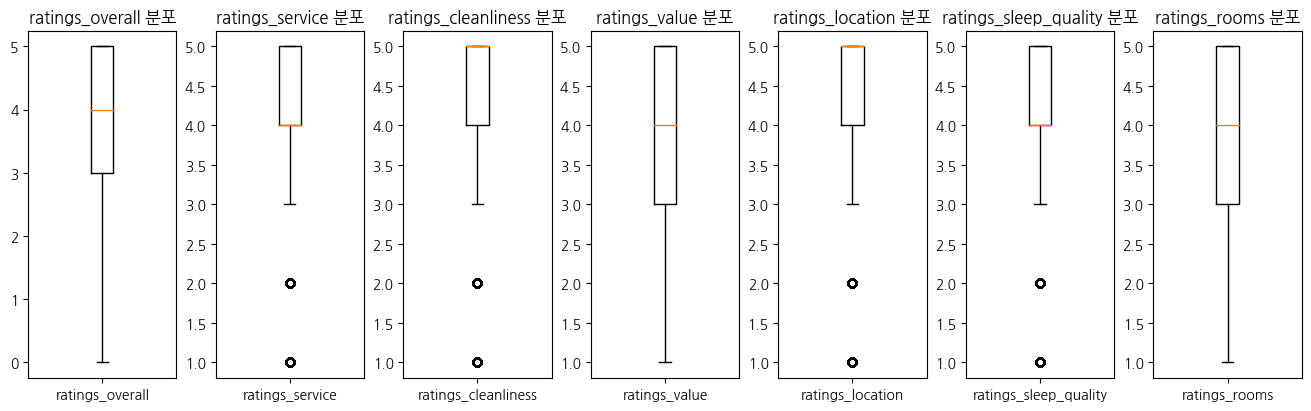

In [53]:
fig, axes = plt.subplots(ncols=7, figsize=(13, 4), constrained_layout=True)

for i in range(7):
    axes[i].boxplot(
        review_df[rating_columns[i]].dropna(),
        labels=[rating_columns[i]]
    )

    axes[i].set_title(f'{rating_columns[i]} 분포')

plt.show()

평점은 대체적으로 3~5점이 일반적이고, 이상치로 1점 또는 2점 분포하는 경우가 많다. 특히 청결 상태, 위치, 수면의 질 항목에 대해서는 5점의 비율이 높다.

이 결과로부터, 유저가 1점 ~ 5점에 **균등하게 응답하지 않는다**는 점을 기억해 둘 필요가 있겠다. 유저가 각자의 기준에 따라 점수를 매긴다는 점은 추후 무언가 모델링을 할 때 유저 개인의 편향성을 제거해야 할 소요가 있을 수도 있음을 의미한다.

#### 2-2-2. 컬럼별 EDA (author)

In [55]:
review_df['author'][0]

"{'username': 'Papa_Panda', 'num_cities': 22, 'num_helpful_votes': 12, 'num_reviews': 29, 'num_type_reviews': 24, 'id': '8C0B42FF3C0FA366A21CFD785302A032', 'location': 'Gold Coast'}"

#### 2-2-3. 컬럼별 EDA (date_stayed)

In [68]:
review_df['date_stayed']

0         December 2012
1         December 2012
2         December 2012
3           August 2012
4         December 2012
              ...      
878556              NaN
878557        July 2008
878558        July 2008
878559        July 2008
878560       March 2008
Name: date_stayed, Length: 878561, dtype: object

연도와 월을 담고 있는 컬럼이다.

In [80]:
def generate_year(date):
    try:
        return datetime.strptime(date, '%B %Y').year
    except:
        return None

def generate_month(date):
    try:
        return datetime.strptime(date, '%B %Y').month
    except:
        return None

review_df['date_stayed_year'] = review_df['date_stayed'].apply(generate_year)
review_df['date_stayed_month'] = review_df['date_stayed'].apply(generate_month)

연도와 월이 내가 익숙치 않은 형식이기 때문에 각각 연도 컬럼, 월 컬럼으로 바꿔줬다.

In [81]:
review_df[['date_stayed', 'date_stayed_year', 'date_stayed_month']]

,date_stayed,date_stayed_year,date_stayed_month
0,December 2012,2012.0,12.0
1,December 2012,2012.0,12.0
2,December 2012,2012.0,12.0
3,August 2012,2012.0,8.0
4,December 2012,2012.0,12.0
...,...,...,...
878556,NaN,NaN,NaN
878557,July 2008,2008.0,7.0
878558,July 2008,2008.0,7.0
878559,July 2008,2008.0,7.0


In [86]:
comments_by_year = review_df.groupby('date_stayed_year').agg({'id': 'count'})
comments_by_year

,id
date_stayed_year,
1999.0,30
2000.0,38
2001.0,52
2002.0,153
2003.0,945
2004.0,4376
2005.0,22299
2006.0,29392
2007.0,46312


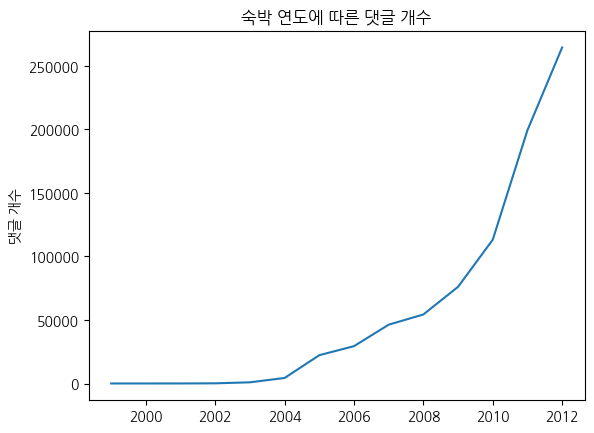

In [101]:
plt.plot(
    comments_by_year
)
plt.ylabel('댓글 개수')
plt.title('숙박 연도에 따른 댓글 개수')
plt.show()

In [89]:
comments_by_month = review_df.groupby('date_stayed_month').agg({'id': 'count'})
comments_by_month

,id
date_stayed_month,
1.0,41575
2.0,44694
3.0,58825
4.0,64692
5.0,67532
6.0,74042
7.0,87348
8.0,89284
9.0,80360


In [96]:
comments_by_month.index

Float64Index([1.0, 2.0, 3.0, 4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 11.0, 12.0], dtype='float64', name='date_stayed_month')

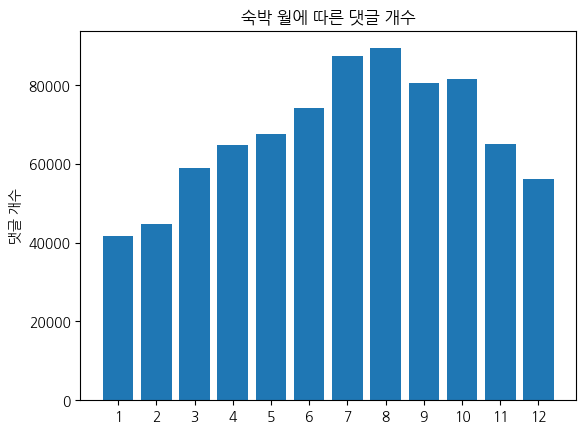

In [102]:
plt.bar(
    comments_by_month.index,
    comments_by_month['id']
)
plt.xticks([i for i in range(1, 13)])
plt.ylabel('댓글 개수')
plt.title('숙박 월에 따른 댓글 개수')
plt.show()

확실히 7~8월이 많다.

#### 2-2-4. 컬럼별 EDA (num_helpful_votes)

In [66]:
review_df['num_helpful_votes'].describe()

count    878561.000000
mean          1.153104
std           2.898120
min           0.000000
25%           0.000000
50%           0.000000
75%           1.000000
max         515.000000
Name: num_helpful_votes, dtype: float64

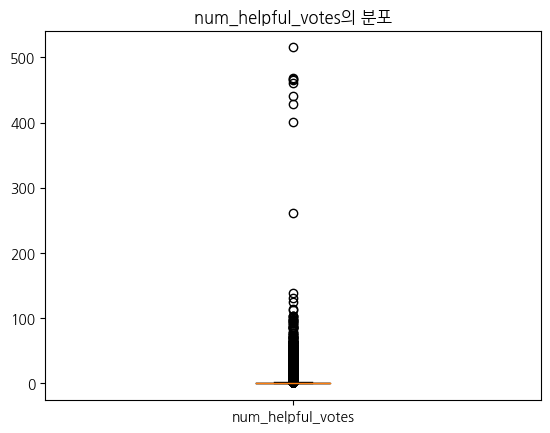

In [67]:
plt.boxplot(
    review_df['num_helpful_votes'],
    labels=['num_helpful_votes']
)
plt.title('num_helpful_votes의 분포')
plt.show()

좋아요 개수는 0개 또는 1개가 일반적이다.

In [110]:
yearly_votes = review_df.groupby('date_stayed_year').agg({'num_helpful_votes': 'mean'})
yearly_votes

,num_helpful_votes
date_stayed_year,
1999.0,6.466667
2000.0,6.394737
2001.0,6.365385
2002.0,5.196078
2003.0,4.580952
2004.0,4.789534
2005.0,6.689269
2006.0,4.900585
2007.0,2.087299


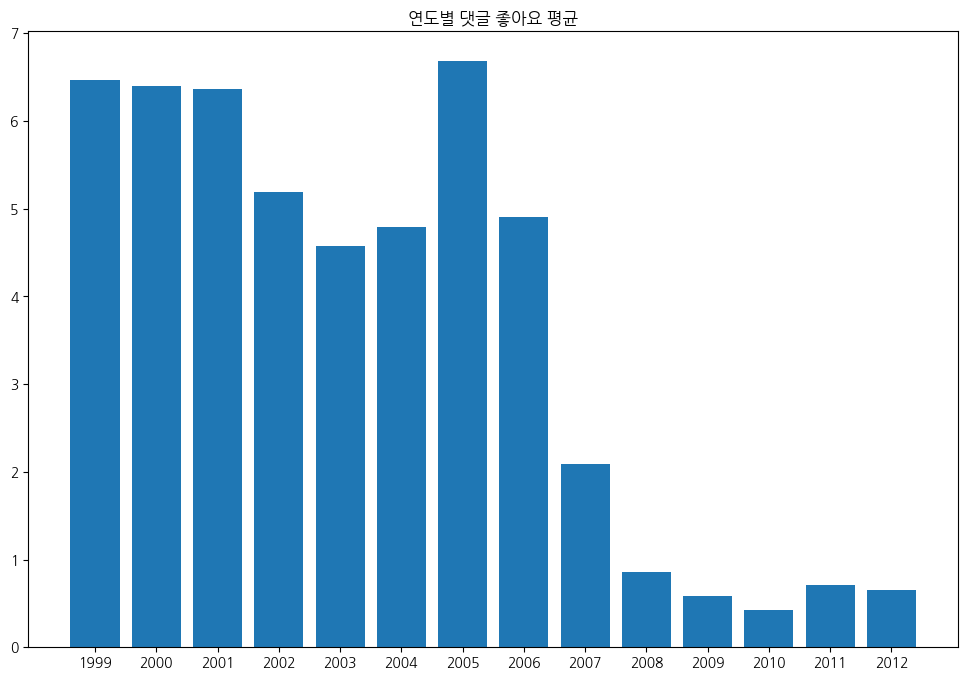

In [118]:
plt.figure(figsize=(12, 8))
plt.bar(
    yearly_votes.index,
    yearly_votes['num_helpful_votes']
)

plt.xticks(yearly_votes.index)
plt.title('연도별 댓글 좋아요 평균')
plt.show()

2007~2008년 이후로 댓글당 평균 좋아요 개수가 확 줄어든 감이 있다. 이는 댓글 개수가 많아졌기 때문으로 보인다.

In [ ]:
# 분포 확인, 시각화, 전처리

In [ ]:
# pickle로 저장

---

## 3. 데이터 분석

### 3-1. 문제 정의

2007~2008년 이전의 표본과 이후

### 3-2. 데이터 분석

In [ ]:
# 가설 검정, 머신러닝, ...

### 3-3. 결과 해석

내용

---

## 4. 후기

내용